In [16]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpldates
import seaborn as sns
from pandas.plotting import _converter
plt.subplots(figsize=(15,4))
%matplotlib inline 
plt.style.use('default')
import datetime
import math
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# Leyendo csvs
df_edu = pd.read_csv("../datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_gen_edad = pd.read_csv("../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv", parse_dates=['fechanacimiento'])
df_vistas = pd.read_csv("../datos_navent_fiuba/fiuba_3_vistas.csv", parse_dates=['timestamp'])
df_postulaciones = pd.read_csv("../datos_navent_fiuba/fiuba_4_postulaciones.csv", parse_dates=['fechapostulacion'])
df_avisos_detalle = pd.read_csv("../datos_navent_fiuba/fiuba_6_avisos_detalle.csv")


In [3]:
df_vistas["timestamp"] = df_vistas["timestamp"].apply(lambda d: d + datetime.timedelta(hours=5))

In [4]:
df_vistas["hour"] = df_vistas["timestamp"].dt.hour
df_vistas["date"] = df_vistas["timestamp"].dt.date
df_postulaciones["hour"] = df_postulaciones["fechapostulacion"].dt.hour
df_postulaciones["date"] =df_postulaciones["fechapostulacion"].dt.date

In [5]:
df_postulaciones['datehour'] = pd.to_datetime({'year': df_postulaciones['fechapostulacion'].dt.year,
                                               'month': df_postulaciones['fechapostulacion'].dt.month,
                                               'day': df_postulaciones['fechapostulacion'].dt.day,
                                               'hour': df_postulaciones['fechapostulacion'].dt.hour})
df_vistas['datehour'] = pd.to_datetime({'year': df_vistas['timestamp'].dt.year,
                                       'month': df_vistas['timestamp'].dt.month,
                                       'day': df_vistas['timestamp'].dt.day,
                                       'hour': df_vistas['timestamp'].dt.hour})

In [35]:
date_min = max(min(df_vistas['datehour']), min(df_postulaciones['datehour']))
date_max = min(max(df_vistas['datehour']), max(df_postulaciones['datehour']))

postulaciones_por_fecha_y_hora = df_postulaciones.loc[(date_min <= df_postulaciones['datehour']) & (df_postulaciones['datehour'] <= date_max)][["datehour", "idaviso", ]].groupby("datehour")["idaviso"].count().sort_index()
vistas_por_fecha_y_hora = df_vistas.loc[(date_min <= df_vistas['datehour']) & (df_vistas['datehour'] <= date_max)][["datehour", "idAviso", ]].groupby("datehour")["idAviso"].count().sort_index()


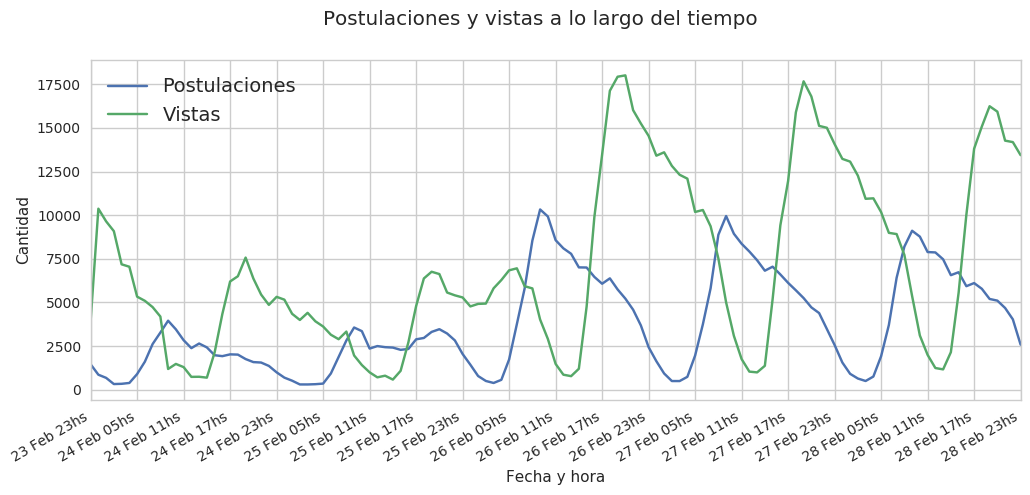

In [101]:
#ax = postulaciones_por_fecha_y_hora.plot()
#vistas_por_fecha_y_hora.plot()
fig, ax = plt.subplots()

ax.plot(postulaciones_por_fecha_y_hora.index, postulaciones_por_fecha_y_hora)
ax.plot(vistas_por_fecha_y_hora.index, vistas_por_fecha_y_hora)

fig = ax.get_figure()
fig.suptitle("Postulaciones y vistas a lo largo del tiempo")
fig.set_figwidth(12)
fig.set_figheight(5)

ax.set_xlabel("Fecha y hora")
ax.set_ylabel("Cantidad")
ax.set_xlim(date_min, date_max)

ax.xaxis.set_major_locator(mpldates.HourLocator(byhour=np.arange(0,24), interval=6))
ax.xaxis.set_major_formatter(mpldates.DateFormatter("%d %h %Hhs"))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Postulaciones', 'Vistas'], fontsize=14)

fig.autofmt_xdate()